# spark foundation 

# shivani kadam
#DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION
#GRIPDEC20 #TSF #DATASCIENCE

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [67]:
import pandas as pd

In [68]:
df=pd.read_csv(r"C:\Users\shivu\Desktop\Iris.csv")
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,
0,5.1,3.5,1.4,0.2,Iris-setosa,NaN
1,4.9,3.0,1.4,0.2,Iris-setosa,NaN
2,4.7,3.2,1.3,0.2,Iris-setosa,NaN
3,4.6,3.1,1.5,0.2,Iris-setosa,NaN
4,5.0,3.6,1.4,0.2,Iris-setosa,NaN
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,NaN
146,6.3,2.5,5.0,1.9,Iris-virginica,NaN
147,6.5,3.0,5.2,2.0,Iris-virginica,NaN
148,6.2,3.4,5.4,2.3,Iris-virginica,NaN


In [69]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,
0,5.1,3.5,1.4,0.2,Iris-setosa,NaN
1,4.9,3.0,1.4,0.2,Iris-setosa,NaN
2,4.7,3.2,1.3,0.2,Iris-setosa,NaN
3,4.6,3.1,1.5,0.2,Iris-setosa,NaN
4,5.0,3.6,1.4,0.2,Iris-setosa,NaN


In [70]:
df.shape

(150, 6)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5                  0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [72]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,
count,150.000000,150.000000,150.000000,150.000000,0.0
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN
max,7.900000,4.400000,6.900000,2.500000,NaN


In [73]:
df.isnull().sum()

SepalLengthCm      0
SepalWidthCm       0
PetalLengthCm      0
PetalWidthCm       0
Species            0
                 150
dtype: int64

In [74]:
df.drop_duplicates(inplace=True)

In [75]:
#label encoding

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

In [77]:
#PetalLengthCm vs PetalWidthCm we'll compare our final plot with this graph to check how accurate our model is

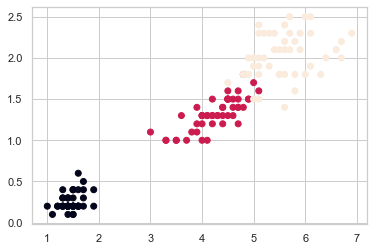

In [78]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df.Species.values)

In [79]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904,NaN
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348,NaN
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339,NaN
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693,NaN
Species,0.782904,-0.418348,0.948339,0.955693,1.000000,NaN
,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#data visulization

<AxesSubplot:>

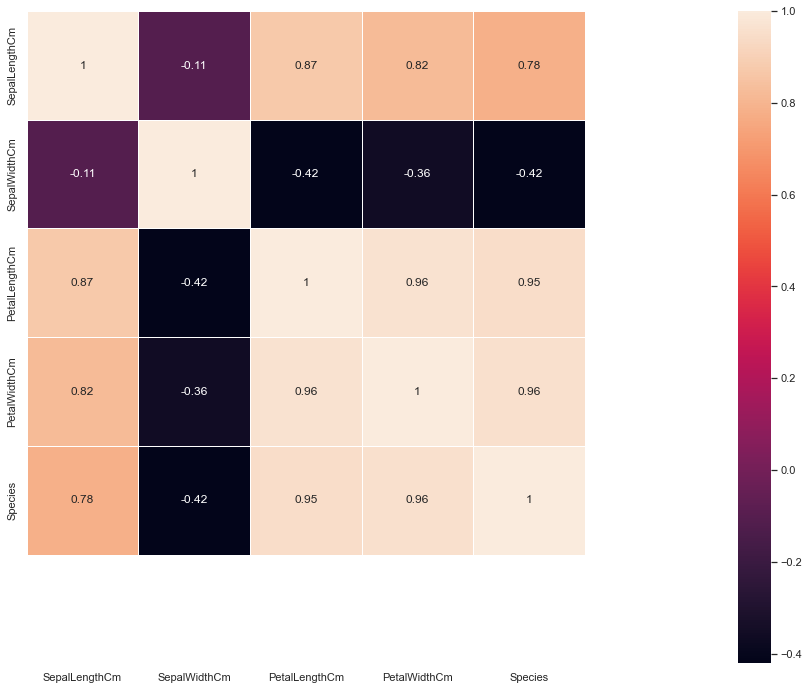

In [81]:
fig=plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),linewidths=1,annot=True)

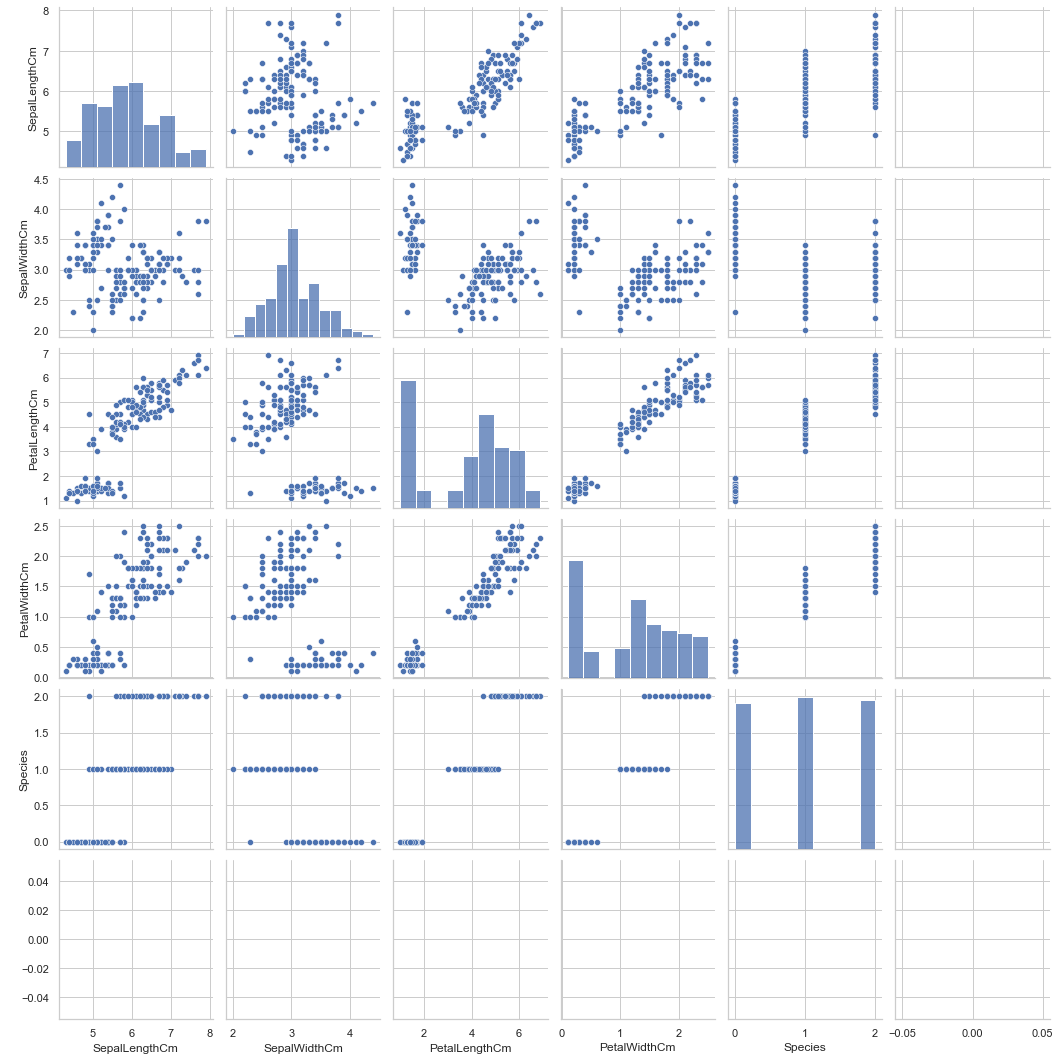

In [82]:
sns.pairplot(df)

In [83]:
#We can see that Species is mainly depend on Petal Length and Petal Width.

#using petal_length and petal_width

In [84]:
df=df.iloc[:,[0,1,2,3]].values

In [85]:
#Elbow Method using within-cluster-sum-of-squares(wcss)

In [86]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\shivu\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[663.8952380952381,
 151.77145833333333,
 77.9198903508772,
 56.64237065018315,
 45.81642192982456,
 38.380978808131445,
 34.11707094757095,
 29.758015809726338,
 27.74499792038027,
 25.769652682285034]

In [87]:
#Using Elbow graph to find optimum no. of Clusters

C:\Users\shivu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


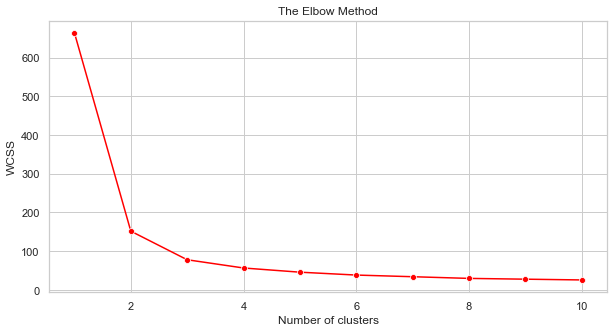

In [88]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
#The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minimal.

#Initialization using K-means+

In [90]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

In [91]:
#visulizeing the cluster

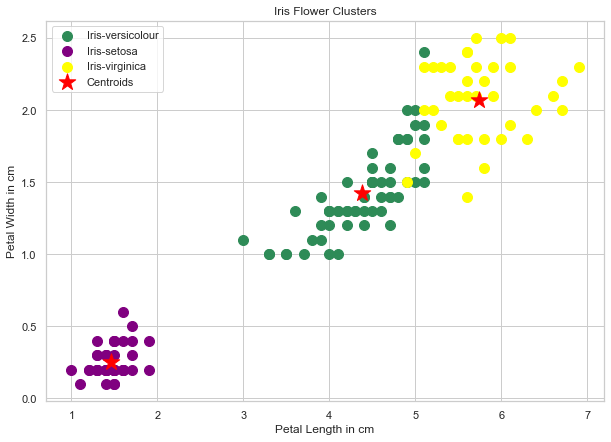

In [92]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(df[y_kmeans == 0, 2], df[y_kmeans == 0, 3], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 1, 2], df[y_kmeans == 1, 3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 2, 2], df[y_kmeans == 2, 3],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

In [93]:
#We can see that our predicted graph is quite similar to the actual one Thank You shivani kadam....